# Linear Regression



La regressione lineare è uno strumento di ML supervisionato per analizzare e modellare la relazione tra una variabile dipendente (o target) e una o più variabili indipendenti (o predittori) attraverso una relazione lineare. In altre parole, la regressione lineare cerca di trovare una linea retta (in un contesto bidimensionale) o un iperpiano (in un contesto multidimensionale) che meglio rappresenti la relazione tra le variabili coinvolte.

### Modello di regressione lineare semplice
Nel caso della regressione lineare semplice, c'è una sola variabile indipendente che influenza la variabile dipendente. Il modello può essere rappresentato dall'equazione:

La regressione lineare è un metodo statistico utilizzato per analizzare e modellare la relazione tra una variabile dipendente (o target) e una o più variabili indipendenti (o predittori) attraverso una relazione lineare. In altre parole, la regressione lineare cerca di trovare una linea retta (in un contesto bidimensionale) o un iperpiano (in un contesto multidimensionale) che meglio rappresenti la relazione tra le variabili coinvolte.

### Modello di regressione lineare semplice

Nel caso della regressione lineare semplice, c'è una sola variabile indipendente che influenza la variabile dipendente. Il modello può essere rappresentato dall'equazione:

$Y = {\beta_0}+{\beta_1}X +{\epsilon}$

- Y è la variabile dipendente.
- X è la variabile indipendente.
- ${\beta_0}$ è l'intercetta, che rappresenta il valore di Y quando X è uguale a zero.
- ${\beta_1}$ è il coefficiente di regressione, che rappresenta la pendenza della retta.
- ${\epsilon}$ rappresenta l'errore residuo, che tiene conto di tutte le influenze non considerate nel modello.

L'obiettivo è trovare i valori ottimali di ${\beta_0}$ e ${\beta_1}$ in modo che il modello si adatti meglio ai dati osservati.


<img src= 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/lin_reg.png' width=600>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [3]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv

In [4]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv"

Text(0.5, 1.0, 'Dataset')

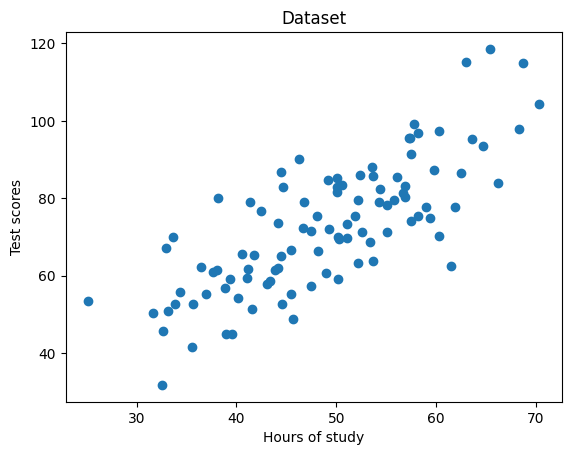

In [5]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0]) # prima colonna indice 0
y = np.array(points[:,1]) # seconda colonna indice 1

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
#plt.show()

## Esempio Semplice (errori non quadrati)

Esisterà sempre una retta interpolatrice che minimizzerà la sommma degli errori totali,
tale per cui lìequazione di questa retta sarà:
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/lr.gif">





<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/gradient.png" width=1000>





$$y = {\beta_0}+{\beta_1}x +{\epsilon}$$

L'obiettivo della regressione lineare è trovare i valori ottimali di
${\beta_0}$  e  ${\beta_1}$
che minimizzano la funzione di costo J, per farlo ho bisogno di calcolare la derivata parziale rispetto entrambi i beta (cosiddetto gradiente)


$\frac{\partial\beta_0}{\partial J} = \frac{1}{m} \sum_{i} (h_{\beta}(x^{(i)}) - y^{(i)})$

dove :
- J è la funzione di costo (solitamente l'errore quadratico medio) che vogliamo minimizzare.
- m è il numero di esempi di addestramento.
- h_β(x^(i)) rappresenta la previsione del modello basata sui parametri β₀ e β₁ per l'input x^(i).
- y^(i) è il valore reale per l'input x^(i).



$\frac{\partial\beta_1}{\partial J} = \frac{1}{m} \sum_{i} (h_{\beta}(x^{(i)}) - y^{(i)}) x^{(i)}$

dove :
- J è la funzione di costo (solitamente l'errore quadratico medio) che vogliamo minimizzare.
- m è il numero di esempi di addestramento.
- h_β(x^(i)) rappresenta la previsione del modello basata sui parametri β₀ e β₁ per l'input x^(i).
- y^(i) è il valore reale per l'input x^(i).
- x^(i) è il valore reale dell'input i-esimo

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Dati di inzio
X = np.array([1, 2, 3, 4, 5])  # Input
y = np.array([2, 4, 5, 4, 5])  # Output

def grad_desc(X,y):
    """ Calcolo del valora ottimale di beta0 e beta1, minimizzando la funzione di costo J
    """
    # Inizializzazione dei parametri del modello
    beta0 = 0.0  # Termine di intercetta
    beta1 = 0.0  # Coefficiente angolare

    # Iperparametri dell'algoritmo
    learning_rate = 0.01  # Tasso di apprendimento
    num_iterations = 100  # Numero di iterazioni

    errors = []

    # Addestramento del modello
    for i in range(num_iterations):
        # Calcola le previsioni del modello
        pred = beta0 + beta1 * X

        # Calcola l'errore
        error = pred - y
        errors.append(np.mean(np.square(error)))  # Calcola l'errore quadratico medio

        # Calcola i gradienti
        gradient_beta0 = (1/len(X)) * np.sum(error) # gradient/theta0
        gradient_beta1 = (1/len(X)) * np.sum(error * X) # gradient/theta1

        # Aggiorna i parametri
        beta0 = beta0 - learning_rate * gradient_beta0
        beta1 = beta1 - learning_rate * gradient_beta1

    return beta0,beta1,errors

Text(0.5, 1.0, "Andamento dell'errore durante l'addestramento")

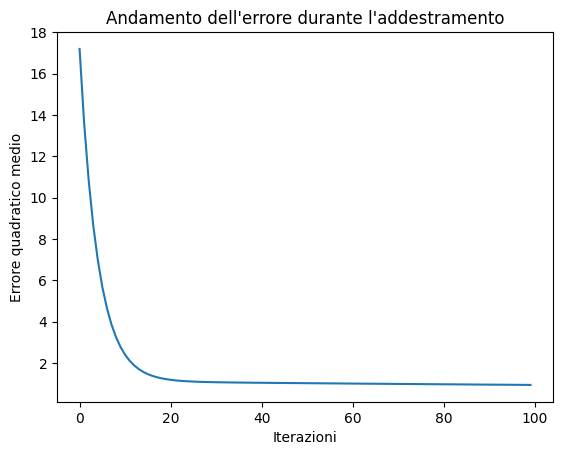

In [7]:
# Crea il grafico dell'errore
beta0,beta1,errors = grad_desc(X,y)

plt.plot(errors)
plt.xlabel('Iterazioni')
plt.ylabel('Errore quadratico medio')
plt.title('Andamento dell\'errore durante l\'addestramento')

#### Plot line of best fit

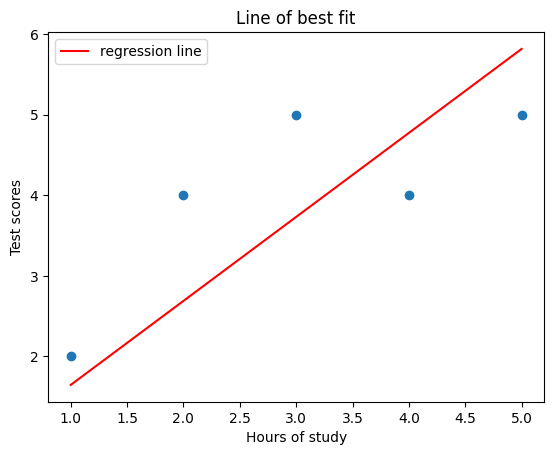

In [8]:
X = np.array([1, 2, 3, 4, 5])  # Input
y = np.array([2, 4, 5, 4, 5])

#Plot dataset
plt.scatter(X, y)
#Predict y values
beta0,beta1,_ = grad_desc(X,y)

y_pred = beta0 + beta1*X
#Plot predictions as line of best fit
plt.plot(X, y_pred, c='r',label='regression line')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.legend(loc=2)
#plt.show()

## Life is easier with Sklearn 🎉

Text(0.5, 1.0, 'Original Dataset')

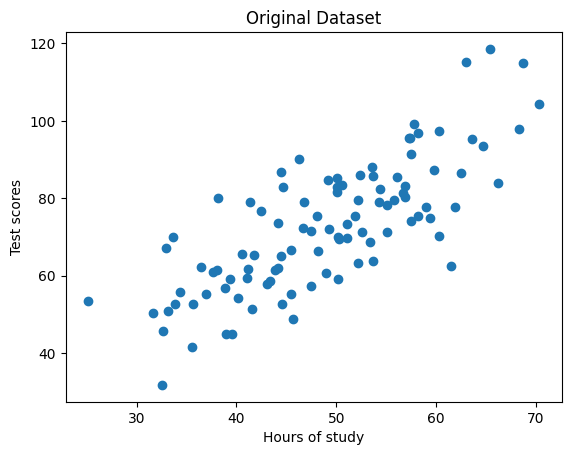

In [9]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0]) # prima colonna indice 0
y = np.array(points[:,1]) # seconda colonna indice 1

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Original Dataset')
#plt.show()

In [10]:
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

In [11]:
# Verifica dimensionalità!!!
x.ndim

1

In [12]:
x.reshape(-1, 1).ndim # reshape when features number==1

2

In [13]:
# STEP N1: declare Features and Target

X = x.reshape(-1, 1) # X--> features
y = y # y--> target

In [14]:
X

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [16]:
#training
model.fit(X,y)

LinearRegression()

In [17]:
# Beta regressor
model.coef_ #b1

array([1.32243102])

In [18]:
# Intercept b0
model.intercept_

np.float64(7.991020982270399)

In [19]:
7.99+(1.32*60) #60 ore

87.19

In [20]:
# y' = 7.99 + 1.32*x

In [21]:
y_pred = model.predict(X)

In [22]:
error = y_pred - y

Text(0, 0.5, 'Test scores')

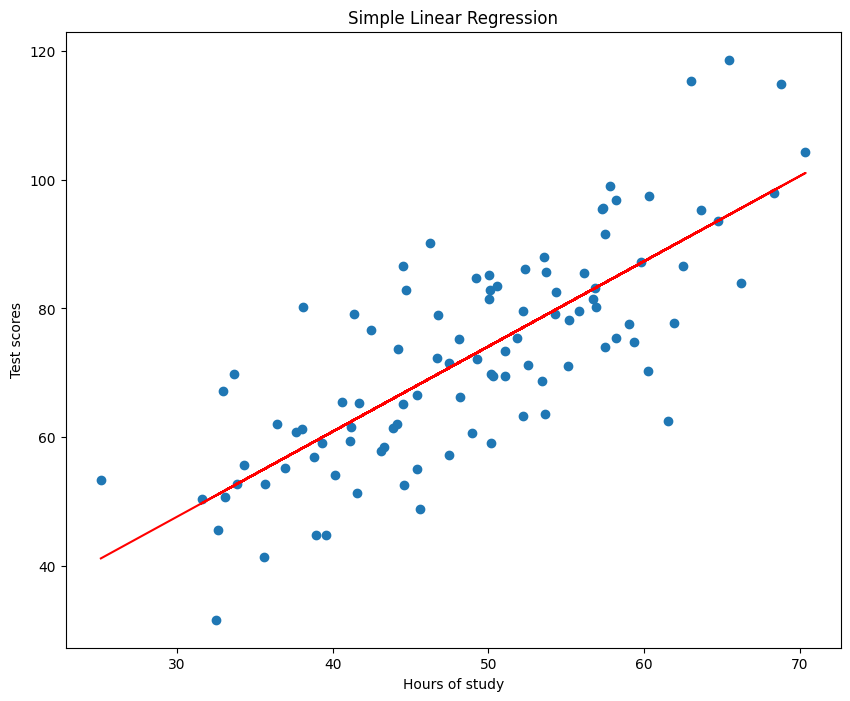

In [23]:
plt.figure(figsize = (10, 8))

plt.scatter(x, y)
plt.plot(x, y_pred,'-r');
plt.title('Simple Linear Regression')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

Text(0.5, 0, 'Errors')

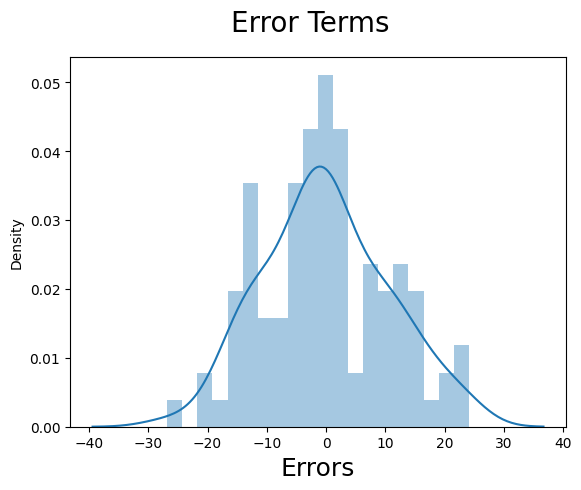

In [24]:
import seaborn as sns

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [25]:
import plotly.express as px

fig = px.scatter(x=x, y=y,
                 opacity=0.65,
                trendline='ols',
                 trendline_color_override='darkblue',
                 width=800
                )
fig.show()

## Train Test Set

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris_8.png' width=650>

In [26]:
# STEP N1: declare Features and Target

X = x.reshape(-1, 1) # X--> features
y = y # y--> target

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667,
                                                    )

In [29]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.coef_

array([1.28944624])

In [32]:
model.intercept_

np.float64(9.664498626786163)

In [33]:
y_pred = model.predict(X_test) #input che non ha mai visto

In [34]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,65.521095,58.569825
1,62.766495,61.684038
2,81.622992,79.550437
3,83.813503,91.486778
4,76.988804,79.641973
5,83.035556,80.207523
6,73.110266,84.742698
7,83.813392,74.084130
8,53.935217,55.723489
9,74.187842,85.232007


In [35]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,65.521095,58.569825,-6.951271
1,62.766495,61.684038,-1.082457
2,81.622992,79.550437,-2.072555
3,83.813503,91.486778,7.673275
4,76.988804,79.641973,2.653169
5,83.035556,80.207523,-2.828033
6,73.110266,84.742698,11.632431
7,83.813392,74.084130,-9.729262
8,53.935217,55.723489,1.788272
9,74.187842,85.232007,11.044166


In [36]:
res_df['error'].mean()

np.float64(-0.29298732665547045)

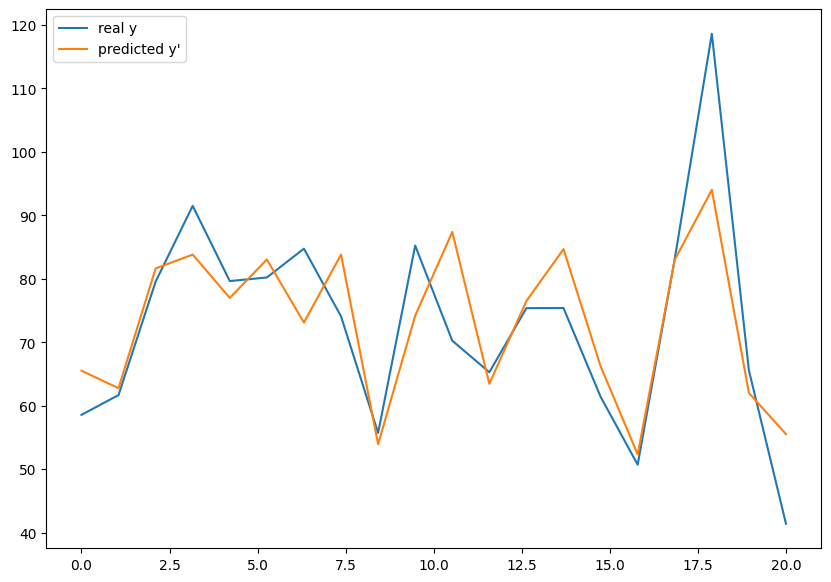

In [37]:
length = y_pred.shape[0] #
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [38]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
fig.show()

In [39]:
y_test.shape

(20,)

In [40]:
y_pred.shape

(20,)

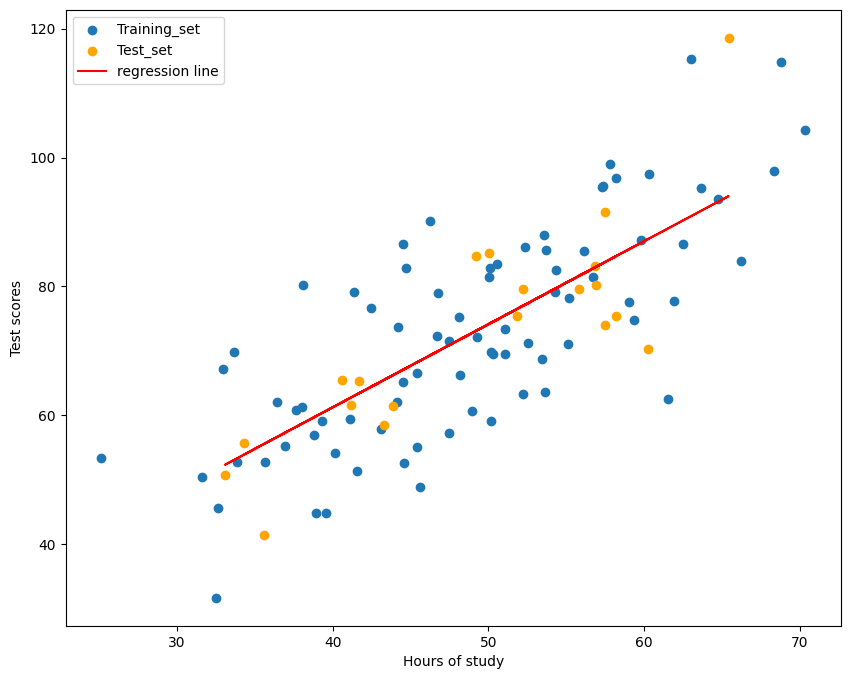

In [41]:
plt.figure(figsize = (10, 8))

plt.scatter(X_train, y_train,label='Training_set')
plt.scatter(X_test, y_test,color='orange',label='Test_set')
plt.plot(X_test, y_pred,color='red',label='regression line')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.legend();

## Ripetere esercizio di ML Linear Regression con dati generati random secondo l'equazione y=3x+noise

In [42]:
generate_random = np.random.RandomState(667)
x = 10 * generate_random.rand(100)

noise = np.random...... #... normally distributed
y =  3 * x + noise

SyntaxError: invalid syntax (<ipython-input-42-6bd1ee690882>, line 4)

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y);

In [ ]:
## definire vettore Feature e target X y ...

## Modello di Regressione Lineare Multipla

Nel caso della regressione lineare multipla, ci sono più variabili indipendenti che influenzano la variabile dipendente. Il modello può essere rappresentato dall'equazione:

$Y = {\beta_0} + {\beta_1}X_1 + {\beta_2}X_2 + {\ldots} + {\beta_p}X_p + {\epsilon}$

- Y è la variabile dipendente.
- X_1, X_2, ${\ldots}$ , X_p sono le variabili indipendenti.
- ${\beta_0}$ è ancora l'intercetta.
- $({\beta_1}, {\beta_2}, {\ldots}, {\beta_p})$ sono i coefficienti di regressione associati a ciascuna variabile indipendente.
- ${\epsilon}$ rappresenta l'errore residuo.

L'obiettivo è trovare i valori ottimali dei coefficienti ${\beta}$ in modo che il modello si adatti meglio ai dati osservati, tenendo conto delle influenze di tutte le variabili indipendenti.

La regressione lineare è ampiamente utilizzata nell'analisi dei dati, nell'ambito della statistica e nell'applicazione pratica di previsioni e modellazione. È un metodo fondamentale per comprendere e prevedere le relazioni tra le variabili in molte discipline, compresa l'economia, la scienza, la finanza e molti altri settori.

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objs as go

# create sample data
np.random.seed(667)
n_samples = 100

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2*x1 + 3*x2 + np.random.randn(n_samples)

# create pandas dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df

,x1,x2,y
0,-1.417239,0.210205,-2.188712
1,-0.062831,0.523627,0.081559
2,-2.241237,-0.368290,-5.684984
3,0.483845,-0.047160,2.645374
4,-0.708039,1.093954,1.867863
...,...,...,...
95,0.657108,1.919547,6.989537
96,-1.233624,-0.350498,-3.248225
97,-0.150959,0.228806,2.312039
98,-0.879206,0.126500,-0.491573


In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['x1'], y=df['x2'], z=df['y'], mode='markers', name='Data Points'))
fig.update_layout(title='Plane Prediction', scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'))
fig.show()

In [44]:
# perform multiple linear regression
X = df[['x1', 'x2']]
y = df['y']

In [55]:
X.values.ndim

2

In [46]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [47]:
model.intercept_

np.float64(-0.011797844655702494)

In [48]:
model.coef_

array([2.04980515, 3.03499985])

In [49]:
# y = -0.0118 + 2.05*x1+ 3.035*x2

In [50]:
# create 3D scatter plot and plane prediction
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
##Prediction Plane
zz = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
zz = zz.reshape(xx1.shape)

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['x1'], y=df['x2'], z=df['y'], mode='markers', name='Data Points'))
fig.add_trace(go.Surface(x=xx1, y=xx2, z=zz, opacity=0.9, name='Plane Prediction'))
fig.update_layout(title='Plane Prediction', scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'))
fig.show()

In [56]:
# make a plane prediction
x1_pred = 1.5
x2_pred = 0.5
y_pred = model.predict([[x1_pred, x2_pred]])
print('Predicted y value for x1 = {} and x2 = {}: {}'.format(x1_pred, x2_pred, y_pred[0]))

Predicted y value for x1 = 1.5 and x2 = 0.5: 4.580409809783164


In [53]:
##esercizio regressione lineare Multipla

#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv

In [54]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv